In [1]:
import os
import glob
import re
import shutil
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
pred=pd.read_csv("/mnt/idms/home/andor/prediction.csv")
pred.rename(columns={'id': 'pid'}, inplace=True)
lab=pd.read_csv("/mnt/idms/home/andor/stats.csv")
merged=pred.merge(lab,on="pid")
merged.rename(columns={'cancer_x': 'pred', 'cancer_y': 'lab'}, inplace=True)
summary=merged[['pid','pred','lab']]
summary['pred_bool']=np.where(summary['pred']>0.5,1,0)
summary.head(20)

/home/andor/anaconda3/envs/CT4/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,pid,pred,lab,pred_bool
0,LIDC-IDRI-0447,0.493740,1,0
1,LIDC-IDRI-0831,0.094139,0,0
2,LIDC-IDRI-0564,0.009711,0,0
3,LIDC-IDRI-0723,0.050270,1,0
4,LIDC-IDRI-0632,0.017658,0,0
5,LIDC-IDRI-0135,0.228096,1,0
6,LIDC-IDRI-0415,0.690609,1,1
7,LIDC-IDRI-0403,0.068024,0,0
8,LIDC-IDRI-0601,0.399131,1,0
9,LIDC-IDRI-0229,0.975891,1,1


In [3]:
correct=np.sum(summary['lab']==summary['pred_bool'])
case_cnt=len(summary)
print(f"There are {correct} correct prediction out of {case_cnt} CTs, giving {correct*100/case_cnt}% accuracy.")

There are 642 correct prediction out of 1003 CTs, giving 64.00797607178464% accuracy.


The AUC is 0.8183431642733968.


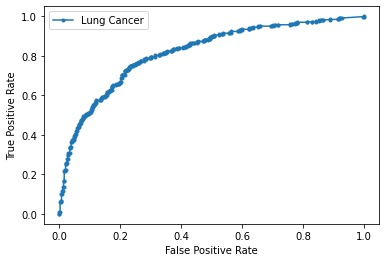

In [4]:
auc = roc_auc_score(summary['lab'], summary['pred'])
fpr, tpr, _ = roc_curve(summary['lab'], summary['pred'])
print(f"The AUC is {auc}.")
pyplot.plot(fpr, tpr, marker='.', label='Lung Cancer')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()